# Color manipulation of images

This is a starter notebook for manipulating images - specifically downsampling the color profile of an image.

First we will import our usual things and create a function that will help us change the # of colors in an image:

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image as Image

# we won't use these packages directly, but the function that picks colors will
import scipy
import scipy.misc
import scipy.cluster

# If you haven't yet, you may need to install scipy
#!conda install -c anaconda scipy


# NOTE: I am not expecting you to know how to write these on your own!
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
    # refs:
    # [1] https://stackoverflow.com/questions/29433243/convert-image-to-specific-palette-using-pil-without-dithering

    silf.load()

    # use palette from reference image
    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
    # the 0 above means turn OFF dithering

    # Later versions of Pillow (4.x) rename _makeself to _new
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    # refs:
    # [1]: https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = ncolors # unnecessary re-naming
    
    ar = np.array(image) # to data
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = np.histogram(vecs, len(codes))    # count occurrences
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

# similar to above, but allows you to import your own RGB sequence
def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') # can't use alpha channel
    NUM_CLUSTERS = len(colors) # unnecessary re-naming
    codes = np.array(colors) # unnecessary renaming
    
    # into a 256 palette, integer types
    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

    # palette formatting:
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

Specify the directory path to your image:

In [97]:
path_to_image1 = 'fuji1.jpg'
path_to_image2 = 'fuji2.jpg'
path_to_image3 = 'fuji3.jpg'

Read in image:

In [98]:
im1 = Image.open(path_to_image1)
im2= Image.open(path_to_image2)
im3= Image.open(path_to_image3)

Take a quick look:

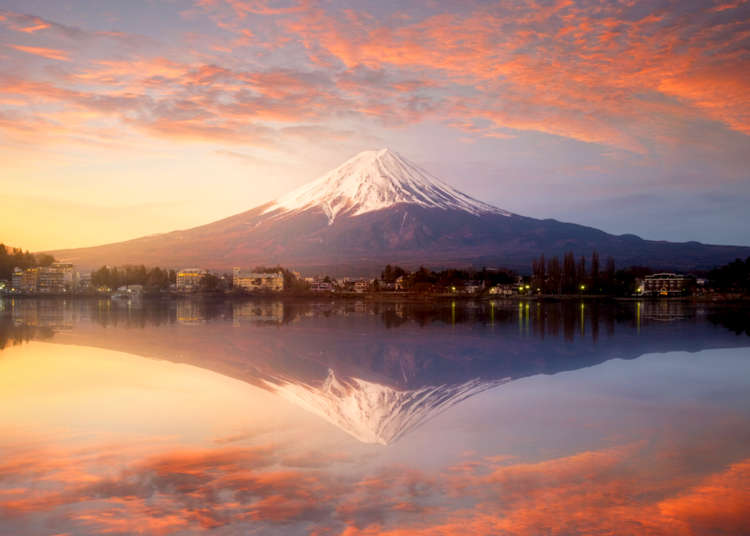

In [100]:
im1


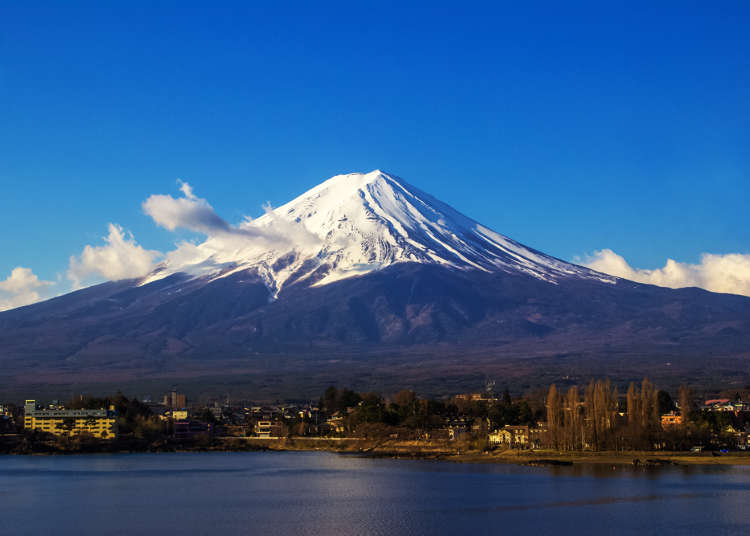

In [101]:
im2

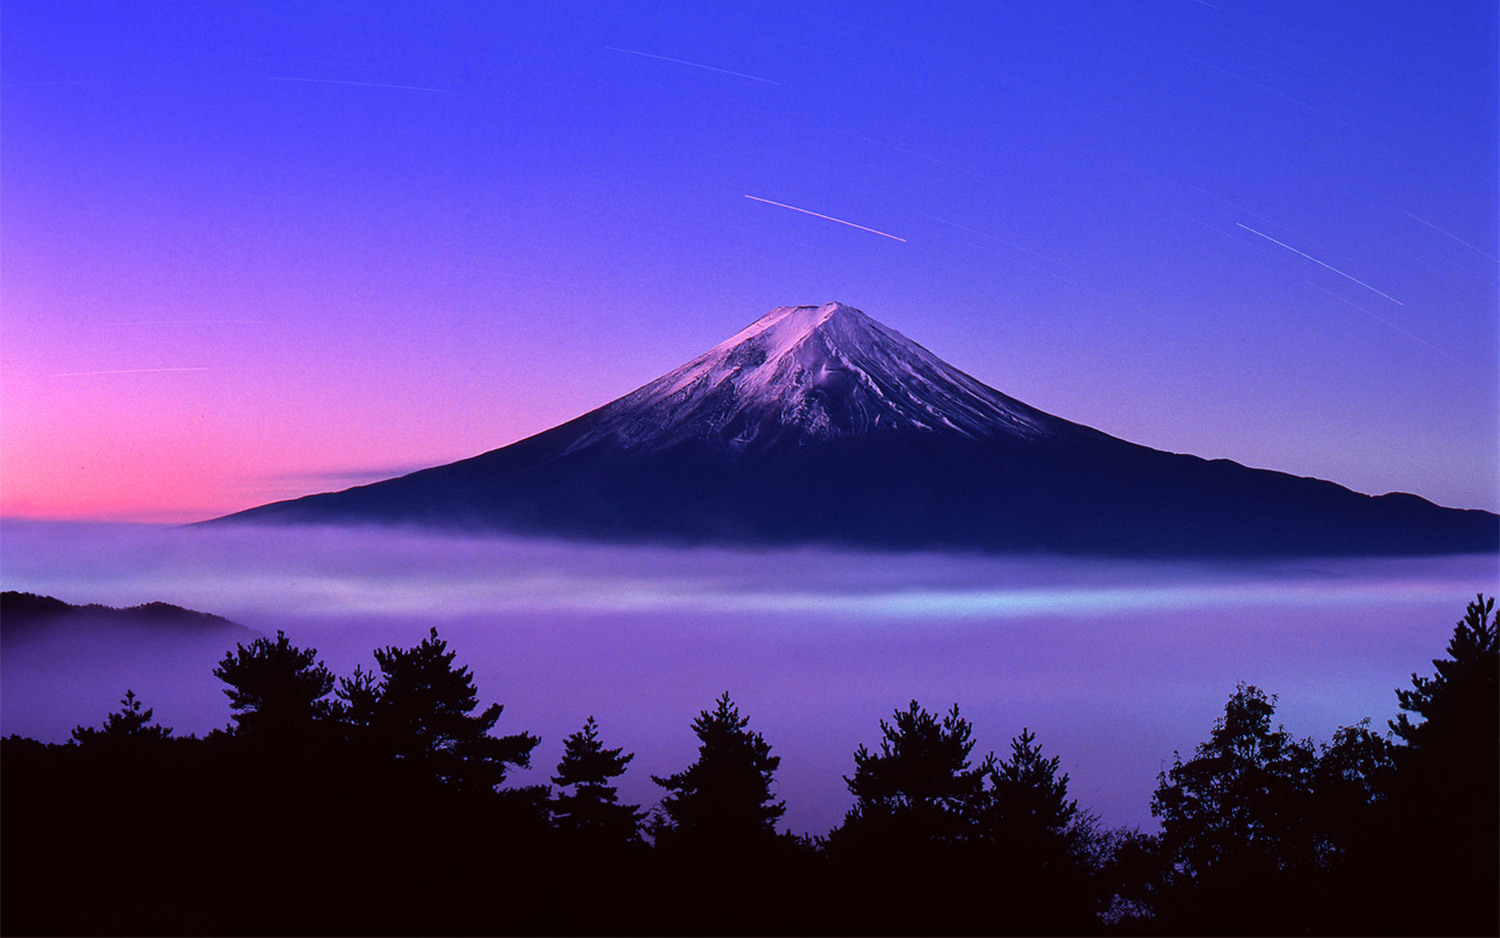

In [102]:
im3

Convert to an 8-color image for easier handling:

In [89]:
new_im1, new_rgbs = convert_image(im1, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[189.52301774 115.00422209  93.25449922]
 [249.52576083 213.08003919 171.19257374]
 [133.44897841  89.57382421  83.04867001]
 [187.16853513 155.71805092 156.7286681 ]
 [139.39788208 125.22855742 138.07105751]
 [228.45724197 157.22793416 127.00030267]
 [ 72.74203664  59.58815229  76.31053856]
 [ 33.02599157  15.62471187  16.1857563 ]]


Take a quick look:

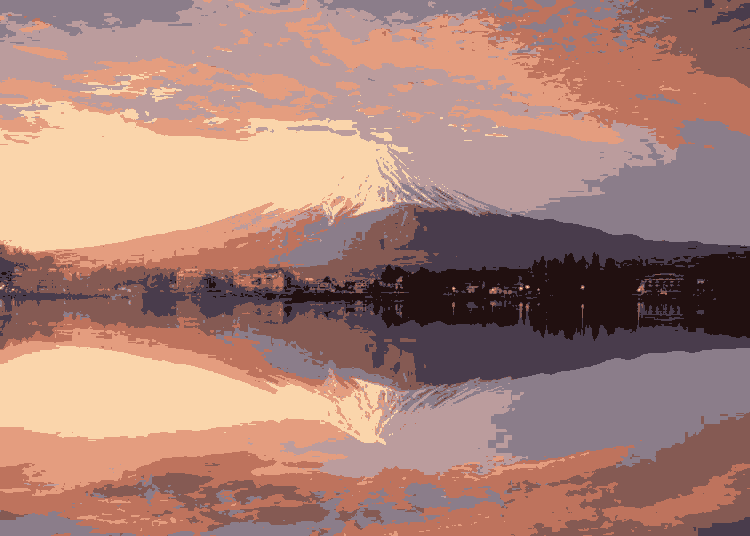

In [90]:
new_im1

In [103]:
new_im2, new_rgbs = convert_image(im2, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[  9.15218004  92.9226276  195.30174162]
 [ 68.85997049  77.83891218 107.33749502]
 [206.18426117 201.9294237  193.8886945 ]
 [ 43.01523402  56.04004718  90.45047289]
 [ 61.82174693  48.03152678  38.92364651]
 [ 66.52762496 143.89437593 201.15193075]
 [ 28.04816131 117.99519468 203.35307478]
 [ 25.54713946  18.94907695  15.06989581]]


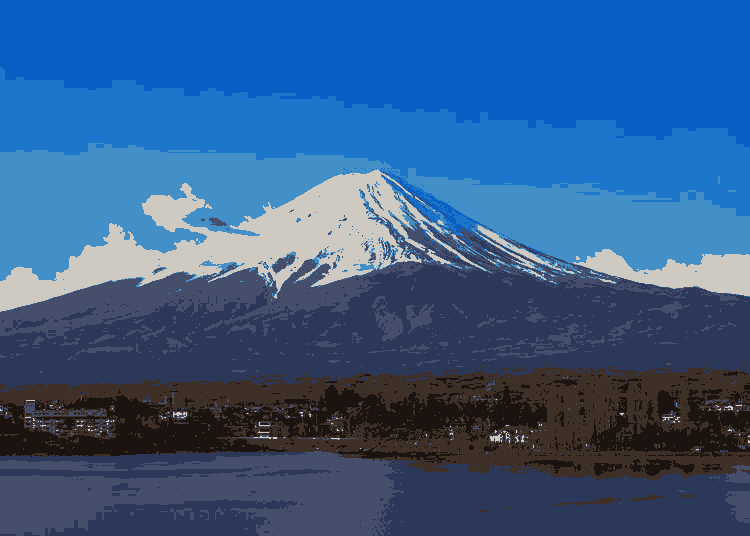

In [104]:
new_im2

In [106]:
new_im3, new_rgbs = convert_image(im3, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[ 22.31759997  23.34764136  80.45142134]
 [ 14.0144393    2.17728782   3.55323211]
 [230.94827177 130.12532597 222.72411218]
 [ 67.96914159  72.40621815 235.04440839]
 [122.27430439 100.61770314 197.22512189]
 [ 83.10869069  65.30129587 151.80899247]
 [103.50716869  90.4121493  242.5308462 ]
 [157.01075301 120.05711057 235.15051993]]


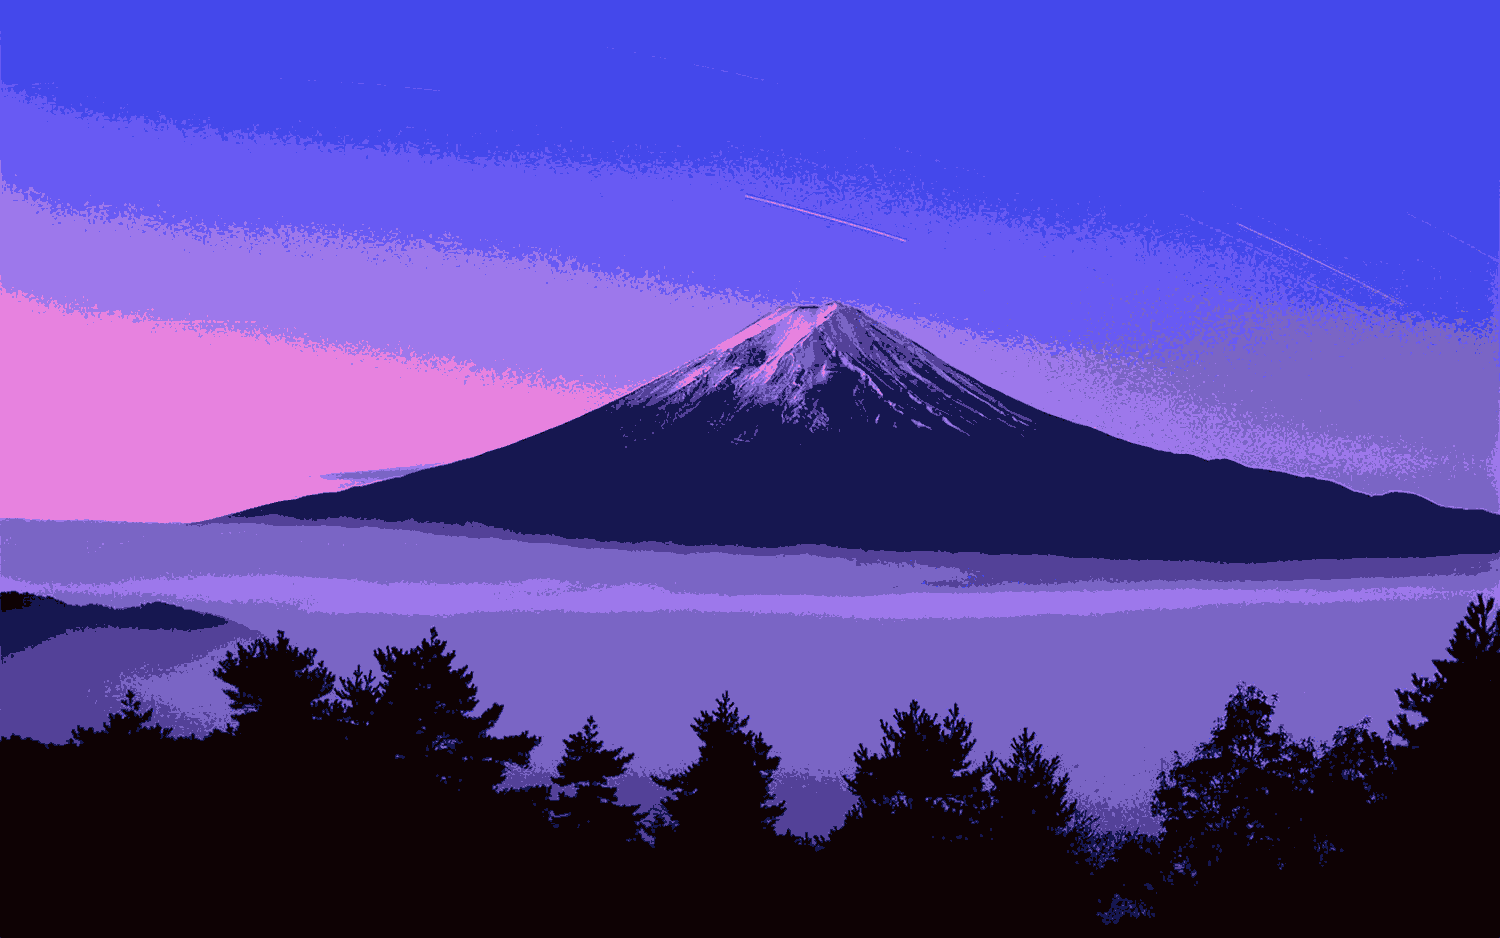

In [107]:
new_im3

We can check that our conversion worked by printing out the unique colors in our new image (note the change to integer values here, as expected by an RGB color map):

In [108]:
new_im1_data = np.array(new_im1)


In [110]:
np.unique(new_im1_data.reshape(-1, new_im_data.shape[2]), axis=0)

array([[ 33,  16,  16],
       [ 73,  60,  76],
       [133,  90,  83],
       [139, 125, 138],
       [187, 156, 157],
       [190, 115,  93],
       [228, 157, 127],
       [250, 213, 171]], dtype=uint8)

In [111]:
im1_data = np.array(new_im1)
im2_data = np.array(new_im2)
im3_data = np.array(new_im3)
im1_data

array([[[139, 125, 138],
        [139, 125, 138],
        [139, 125, 138],
        ...,
        [133,  90,  83],
        [133,  90,  83],
        [133,  90,  83]],

       [[139, 125, 138],
        [139, 125, 138],
        [139, 125, 138],
        ...,
        [133,  90,  83],
        [133,  90,  83],
        [133,  90,  83]],

       [[139, 125, 138],
        [139, 125, 138],
        [139, 125, 138],
        ...,
        [133,  90,  83],
        [133,  90,  83],
        [133,  90,  83]],

       ...,

       [[139, 125, 138],
        [139, 125, 138],
        [139, 125, 138],
        ...,
        [ 73,  60,  76],
        [ 73,  60,  76],
        [ 73,  60,  76]],

       [[139, 125, 138],
        [139, 125, 138],
        [139, 125, 138],
        ...,
        [ 73,  60,  76],
        [ 73,  60,  76],
        [ 73,  60,  76]],

       [[139, 125, 138],
        [139, 125, 138],
        [139, 125, 138],
        ...,
        [ 73,  60,  76],
        [ 73,  60,  76],
        [ 73,  60,  76]]

In [112]:
im2_data

array([[[  9,  93, 195],
        [  9,  93, 195],
        [  9,  93, 195],
        ...,
        [  9,  93, 195],
        [  9,  93, 195],
        [  9,  93, 195]],

       [[  9,  93, 195],
        [  9,  93, 195],
        [  9,  93, 195],
        ...,
        [  9,  93, 195],
        [  9,  93, 195],
        [  9,  93, 195]],

       [[  9,  93, 195],
        [  9,  93, 195],
        [  9,  93, 195],
        ...,
        [  9,  93, 195],
        [  9,  93, 195],
        [  9,  93, 195]],

       ...,

       [[ 69,  78, 107],
        [ 69,  78, 107],
        [ 69,  78, 107],
        ...,
        [ 43,  56,  90],
        [ 43,  56,  90],
        [ 43,  56,  90]],

       [[ 43,  56,  90],
        [ 43,  56,  90],
        [ 43,  56,  90],
        ...,
        [ 43,  56,  90],
        [ 43,  56,  90],
        [ 43,  56,  90]],

       [[ 43,  56,  90],
        [ 43,  56,  90],
        [ 43,  56,  90],
        ...,
        [ 43,  56,  90],
        [ 43,  56,  90],
        [ 43,  56,  90]]

In [113]:
im3_data

array([[[ 68,  72, 235],
        [ 68,  72, 235],
        [ 68,  72, 235],
        ...,
        [ 68,  72, 235],
        [ 68,  72, 235],
        [ 68,  72, 235]],

       [[ 68,  72, 235],
        [ 68,  72, 235],
        [ 68,  72, 235],
        ...,
        [ 68,  72, 235],
        [ 68,  72, 235],
        [ 68,  72, 235]],

       [[ 68,  72, 235],
        [ 68,  72, 235],
        [ 68,  72, 235],
        ...,
        [ 68,  72, 235],
        [ 68,  72, 235],
        [ 68,  72, 235]],

       ...,

       [[ 14,   2,   4],
        [ 14,   2,   4],
        [ 14,   2,   4],
        ...,
        [ 14,   2,   4],
        [ 14,   2,   4],
        [ 14,   2,   4]],

       [[ 14,   2,   4],
        [ 14,   2,   4],
        [ 14,   2,   4],
        ...,
        [ 14,   2,   4],
        [ 14,   2,   4],
        [ 14,   2,   4]],

       [[ 22,  23,  80],
        [ 14,   2,   4],
        [ 14,   2,   4],
        ...,
        [ 14,   2,   4],
        [ 14,   2,   4],
        [ 22,  23,  80]]

In [124]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(im1_data.reshape(-1, im1_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = im1_data[:,:,0] == rgba[0]
    greens_mask = im1_data[:,:,1] == rgba[1]
    blues_mask = im1_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = im1_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

In [125]:
colors

[array([0.12941176, 0.0627451 , 0.0627451 ]),
 array([0.28627451, 0.23529412, 0.29803922]),
 array([0.52156863, 0.35294118, 0.3254902 ]),
 array([0.54509804, 0.49019608, 0.54117647]),
 array([0.73333333, 0.61176471, 0.61568627]),
 array([0.74509804, 0.45098039, 0.36470588]),
 array([0.89411765, 0.61568627, 0.49803922]),
 array([0.98039216, 0.83529412, 0.67058824])]

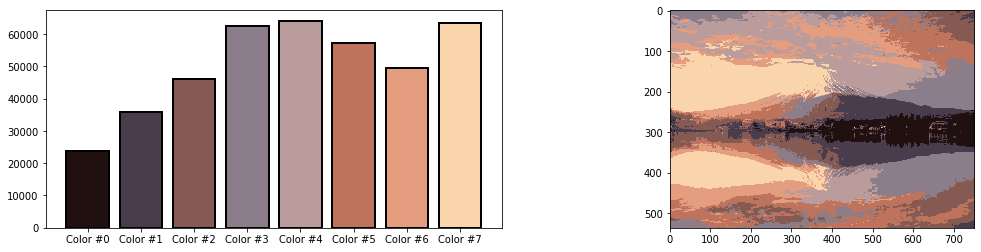

In [126]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) 

for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

#Image
ax[1].imshow(new_im1)
plt.show()

In [127]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(im2_data.reshape(-1, im2_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = im2_data[:,:,0] == rgba[0]
    greens_mask = im2_data[:,:,1] == rgba[1]
    blues_mask = im2_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = im2_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

In [128]:
colors

[array([0.03529412, 0.36470588, 0.76470588]),
 array([0.10196078, 0.0745098 , 0.05882353]),
 array([0.10980392, 0.4627451 , 0.79607843]),
 array([0.16862745, 0.21960784, 0.35294118]),
 array([0.24313725, 0.18823529, 0.15294118]),
 array([0.2627451 , 0.56470588, 0.78823529]),
 array([0.27058824, 0.30588235, 0.41960784]),
 array([0.80784314, 0.79215686, 0.76078431])]

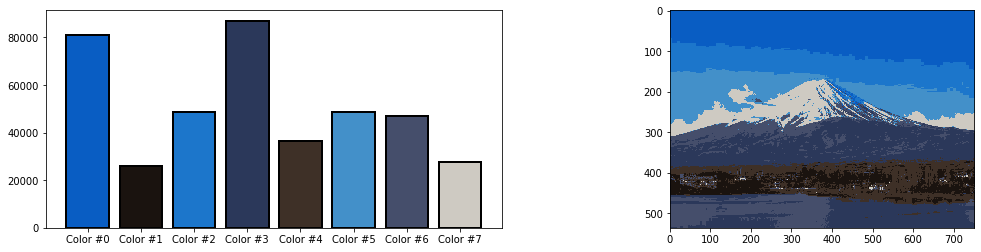

In [129]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) 

for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

#Image
ax[1].imshow(new_im2)
plt.show()

In [130]:
number_of_pixels_of_a_color = []
color_labels = []
colors = []
for icolor,rgba in enumerate(np.unique(im3_data.reshape(-1, im3_data.shape[2]), axis=0)):
    #print(icolor, rgba)
    
    # mask each channel
    reds_mask = im3_data[:,:,0] == rgba[0]
    greens_mask = im3_data[:,:,1] == rgba[1]
    blues_mask = im3_data[:,:,2] == rgba[2]

    # combined mask
    pixel_mask = reds_mask & greens_mask & blues_mask
    
    # grab number of pixels
    this_color_pixels = im3_data[pixel_mask]
    number_of_pixels_of_a_color.append(len(this_color_pixels))
    # this could be done better...
    color_labels.append( 'Color #' + str(icolor) )
    
    colors.append( rgba/255 )

In [131]:
colors

[array([0.05490196, 0.00784314, 0.01568627]),
 array([0.08627451, 0.09019608, 0.31372549]),
 array([0.26666667, 0.28235294, 0.92156863]),
 array([0.3254902 , 0.25490196, 0.59607843]),
 array([0.40784314, 0.35294118, 0.95294118]),
 array([0.47843137, 0.39607843, 0.77254902]),
 array([0.61568627, 0.47058824, 0.92156863]),
 array([0.90588235, 0.50980392, 0.8745098 ])]

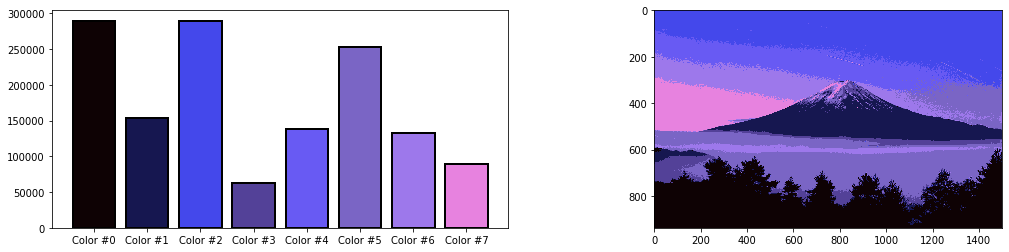

In [132]:
fig, ax = plt.subplots(1,2, figsize=(18,4))

myBarChart = ax[0].bar(color_labels, number_of_pixels_of_a_color) 

for i in range(len(myBarChart)):
    myBarChart[i].set_color(colors[i])
    myBarChart[i].set_edgecolor('black') # because one of our colors is white
    myBarChart[i].set_linewidth(2) # so we can see the outlines clearly

#Image
ax[1].imshow(new_im3)
plt.show()